In [1]:
from IPython.display import Markdown
from IPython.core.debugger import set_trace as breakpt
from IPython.display import Image # Syntax: Image(filename='file', width=wd, height=ht)

# Day 7: Handy Haversacks

Reference: https://adventofcode.com/2020/day/7

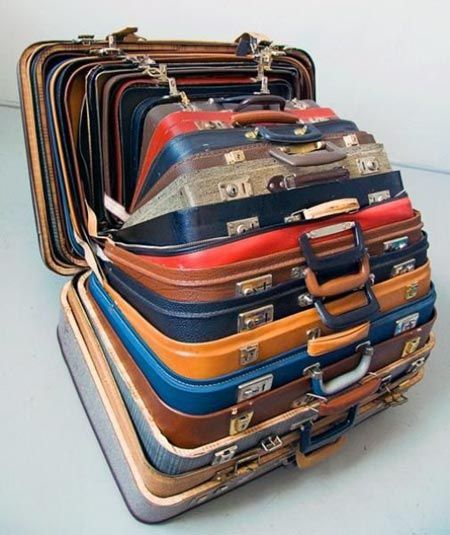

In [2]:
Image('recur_suitcase.jpg')

Image courtesy: [Critical-Function956](https://www.reddit.com/user/Critical-Function956/)
in [r/adventofcode](https://www.reddit.com/r/adventofcode/comments/k8ccpz/shiny_gold/)

## Part 1

You land at the regional airport in time for your next flight. In fact, it looks like you'll even have time to grab some food: all flights are currently delayed due to issues in luggage processing.

Due to recent aviation regulations, many rules (your puzzle input) are being enforced about bags and their contents; bags must be color-coded and must contain specific quantities of other color-coded bags. Apparently, nobody responsible for these regulations considered how long they would take to enforce!

For example, consider the following rules:
```
light red bags contain 1 bright white bag, 2 muted yellow bags.
dark orange bags contain 3 bright white bags, 4 muted yellow bags.
bright white bags contain 1 shiny gold bag.
muted yellow bags contain 2 shiny gold bags, 9 faded blue bags.
shiny gold bags contain 1 dark olive bag, 2 vibrant plum bags.
dark olive bags contain 3 faded blue bags, 4 dotted black bags.
vibrant plum bags contain 5 faded blue bags, 6 dotted black bags.
faded blue bags contain no other bags.
dotted black bags contain no other bags.
```
These rules specify the required contents for 9 bag types. In this example, every faded blue bag is empty, every vibrant plum bag contains 11 bags (5 faded blue and 6 dotted black), and so on.

You have a shiny gold bag. If you wanted to carry it in at least one other bag, how many different bag colors would be valid for the outermost bag? (In other words: how many colors can, eventually, contain at least one shiny gold bag?)

In the above rules, the following options would be available to you:

    A bright white bag, which can hold your shiny gold bag directly.
    A muted yellow bag, which can hold your shiny gold bag directly, plus some other bags.
    A dark orange bag, which can hold bright white and muted yellow bags, either of which could then hold your shiny gold bag.
    A light red bag, which can hold bright white and muted yellow bags, either of which could then hold your shiny gold bag.

So, in this example, the number of bag colors that can eventually contain at least one shiny gold bag is 4.

How many bag colors can eventually contain at least one shiny gold bag? (The list of rules is quite long; make sure you get all of it.)

In [2]:
bagdict = dict()
with open('bagrules_input.txt', 'r') as fid:
#with open('test_bagrules_input.txt', 'r') as fid:
    for line in fid:
        k, bagstr = line.strip().split('contain')
        # baglist contains description of available bags
        baglist = [x.strip(' .') for x in bagstr.split(',')]
        # bagset is set of bags that can be held by the bag color
        bagset = set()
        if 'no other bags' not in baglist:
            for b in baglist:
                num, color = b.split(' ', 1)
                # Remove the 'bag(s)' from the color name
                bcolor = color.rsplit(' ', 1)[0]
                bagset.add(bcolor)
        else:
            pass
        # Remove the 'bag(s)' from the key name
        kcolor = k.strip().rsplit(' ', 1)[0]
        bagdict[kcolor] = bagset
#display(bagdict)

In [3]:
# Top level gold
for k, v in bagdict.items():
    if 'shiny gold' in v:
        print(k, v)

clear brown {'muted gray', 'shiny gold'}
light lime {'shiny gold', 'posh salmon'}
drab cyan {'posh blue', 'shiny gold', 'light cyan'}
drab yellow {'shiny gold'}


In [4]:
def hasgold(color, doeshave=False):
    for c in bagdict[color]:
        if doeshave:
            # Match already found, no need to continue
            return True
        if not bagdict[c]:
            # Empty set, nothing to do
            pass
        elif 'shiny gold' in c:
            # This color bag does hold shiny gold
            return True
        else:
            # Try the bags this bag holds
            doeshave = hasgold(c)
    return doeshave

#for bc in bagdict.keys():
#    display(Markdown("**{}**".format(bc)))
#    print(hasgold(bc))

In [5]:
canhold = [hasgold(x) for x in bagdict.keys()]

In [6]:
#Markdown("**{}** bag colors can eventually contain one shiny gold bag".format(sum(canhold)))

## Part 2

It's getting pretty expensive to fly these days - not because of ticket prices, but because of the ridiculous number of bags you need to buy!

Consider again your shiny gold bag and the rules from the above example:

    faded blue bags contain 0 other bags.
    dotted black bags contain 0 other bags.
    vibrant plum bags contain 11 other bags: 5 faded blue bags and 6 dotted black bags.
    dark olive bags contain 7 other bags: 3 faded blue bags and 4 dotted black bags.

So, a single shiny gold bag must contain 1 dark olive bag (and the 7 bags within it) plus 2 vibrant plum bags (and the 11 bags within each of those): 1 + 1*7 + 2 + 2*11 = 32 bags!

Of course, the actual rules have a small chance of going several levels deeper than this example; be sure to count all of the bags, even if the nesting becomes topologically impractical!

Here's another example:
```
shiny gold bags contain 2 dark red bags.
dark red bags contain 2 dark orange bags.
dark orange bags contain 2 dark yellow bags.
dark yellow bags contain 2 dark green bags.
dark green bags contain 2 dark blue bags.
dark blue bags contain 2 dark violet bags.
dark violet bags contain no other bags.
```
In this example, a single shiny gold bag must contain 126 other bags.

How many individual bags are required inside your single shiny gold bag?

In [7]:
bagdict2 = dict()
with open('bagrules_input.txt', 'r') as fid:
#with open('test2_bagrules_input.txt', 'r') as fid:
#with open('test3_bagrules_input.txt', 'r') as fid:
    for line in fid:
        k, bagstr = line.strip().split('contain')
        # baglist contains description of available bags
        baglist = [x.strip(' .') for x in bagstr.split(',')]
        # baghold is dict of bags and number held by the bag color
        baghold = dict()
        if 'no other bags' not in baglist:
            for b in baglist:
                num, color = b.split(' ', 1)
                # Remove the 'bag(s)' from the color name
                bcolor = color.rsplit(' ', 1)[0]
                baghold[bcolor] = int(num)
        # Remove the 'bag(s)' from the key name
        kcolor = k.strip().rsplit(' ', 1)[0]
        bagdict2[kcolor] = baghold
#display(bagdict2)

In [8]:
def holding(color, holdsum=0):
    for c, n in bagdict2[color].items():
        holdsum += n * (holding(c) + 1)
    return holdsum

#nbags = holding('gold')
nbags = holding('shiny gold')

In [9]:
#Markdown("**{}** individual bags are required inside my single shiny gold bag"
#        .format(nbags))